## <center>Predict whether the Employee of an Organization should get Promotion or Not?</center>

&nbsp;

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

## Importing all the Required Libraries

* We Import Numpy, Pandas, Matplot, and Seaborn for Data Analysis and Visualizations
* We import ipywidgets, Sweetviz, ppscore for Exploratory Data Analysis
* We Import Sklearn, Imblearn for Machine Learning Modelling

In [104]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

## Reading the Dataset

* Here, we are having two datasets, i.e., Training and Testing Datasets
* We will read both the datasets 
* Training Datasets is used to train the Machine learning Models
* After learning the patterns from the Testing Datasets, We have to predict the Target Variable.

In [105]:
# reading the datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Examining the Data

* This is an Important Step in Data Science and Machine Learning to ensure about the columns, and rows present.
* First, we will check the shape of the dataset
* Second, we will check the head, tail, and sample of the datasets
* Third, we will check the Data Description
* Then, we will check the Data Types of the columns present in the data.
* Atlast, we will check the Target Class Balance

In [106]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [107]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [108]:
# columns in Testing Data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [109]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [110]:
# lets check the head of the test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [111]:
# lets also check the tail of the test data
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [112]:
# lets also check the tail of the test data
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


## <center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [113]:
# values in Departments

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [114]:
# values in Region

train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [115]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [116]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


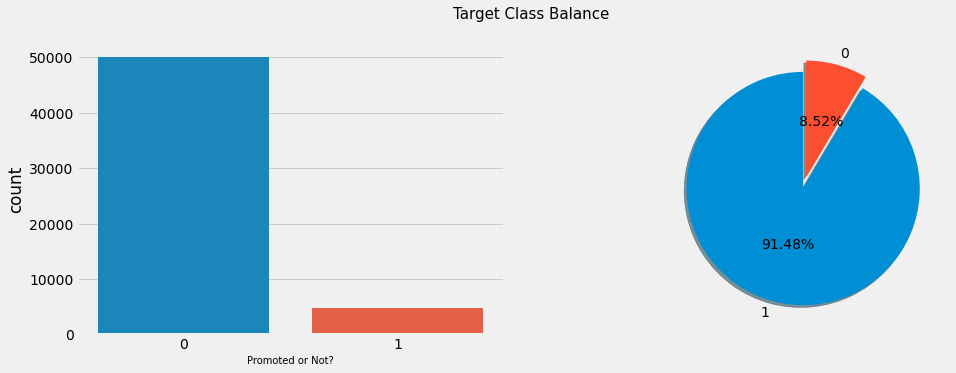

In [117]:
# lets check the Target Class Balance

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

## Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

In [118]:
# missing values in training data set

# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)

# lets check the head
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [119]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [120]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


## Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance. Instead, automatic outlier detection methods can be used in the modeling pipeline and compared, just like other data preparation transforms that may be applied to the dataset.

In [121]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


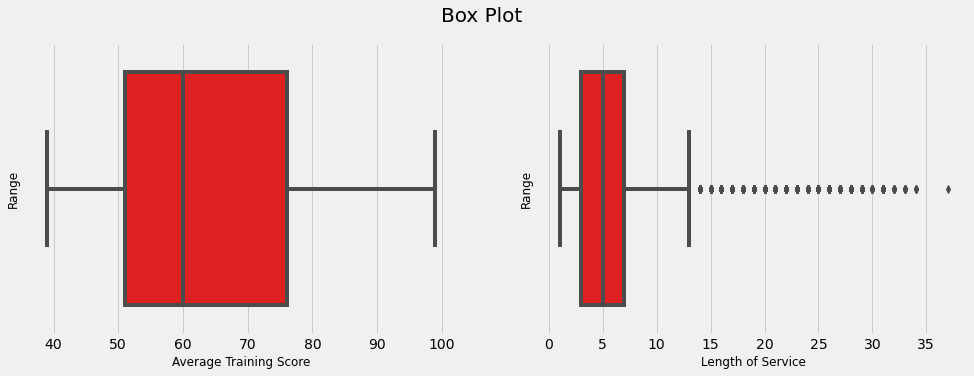

In [122]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [123]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]

## Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

* This is an Essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univariate Analysis for Numerical Columns to check for Outliers by using Box plots.
* Then, we will use Distribution plots to check the distribution of the Numerical Columns in the Dataset.
* After that we will check the Univariate Analysis for Categorical Columns using Pie charts, and Count plots.
* We Use Pie charts, when we have very few categories in the categorical column, and we use count plots we have more categorises in the dataset.

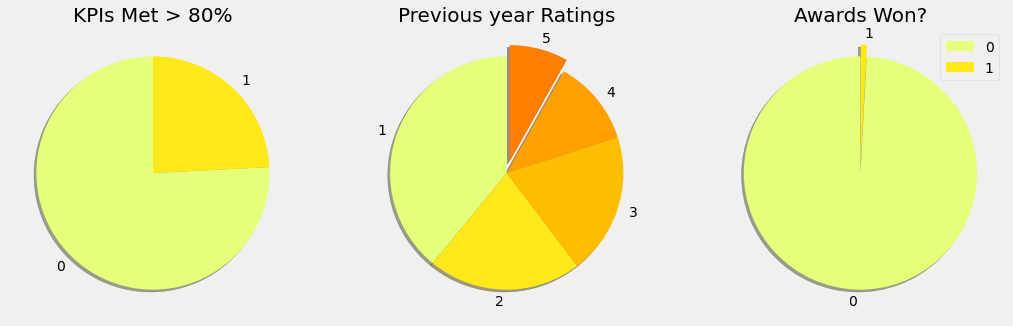

In [124]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()

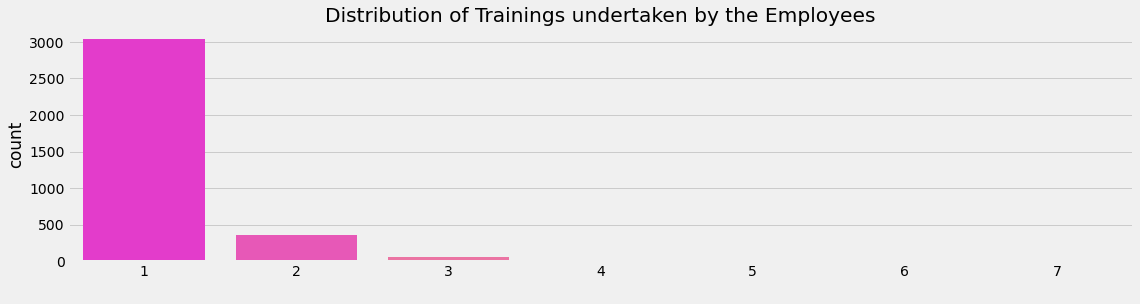

In [125]:
# lets check the distribution of trainings undertaken by the employees

plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

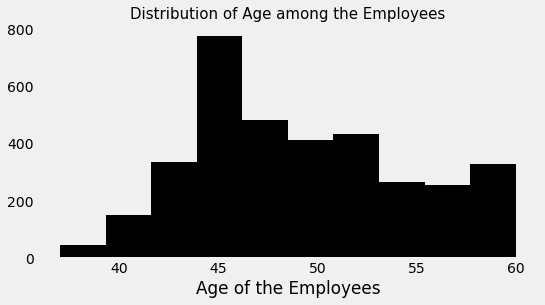

In [126]:
# lets check the Age of the Employees

plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

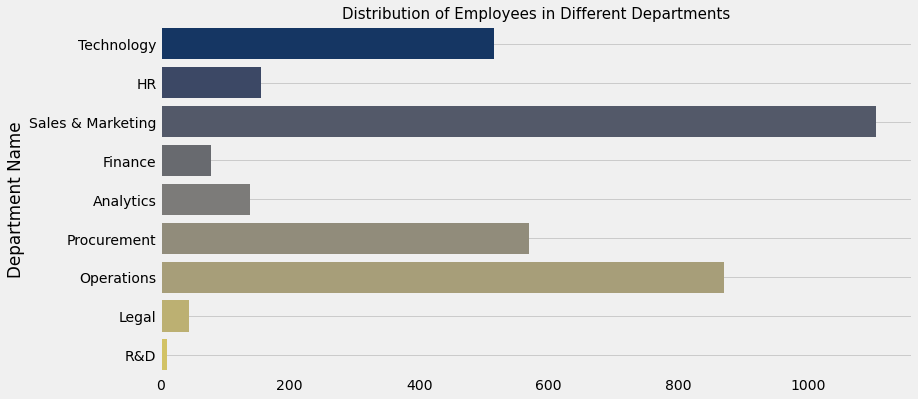

In [127]:
# lets check different Departments

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

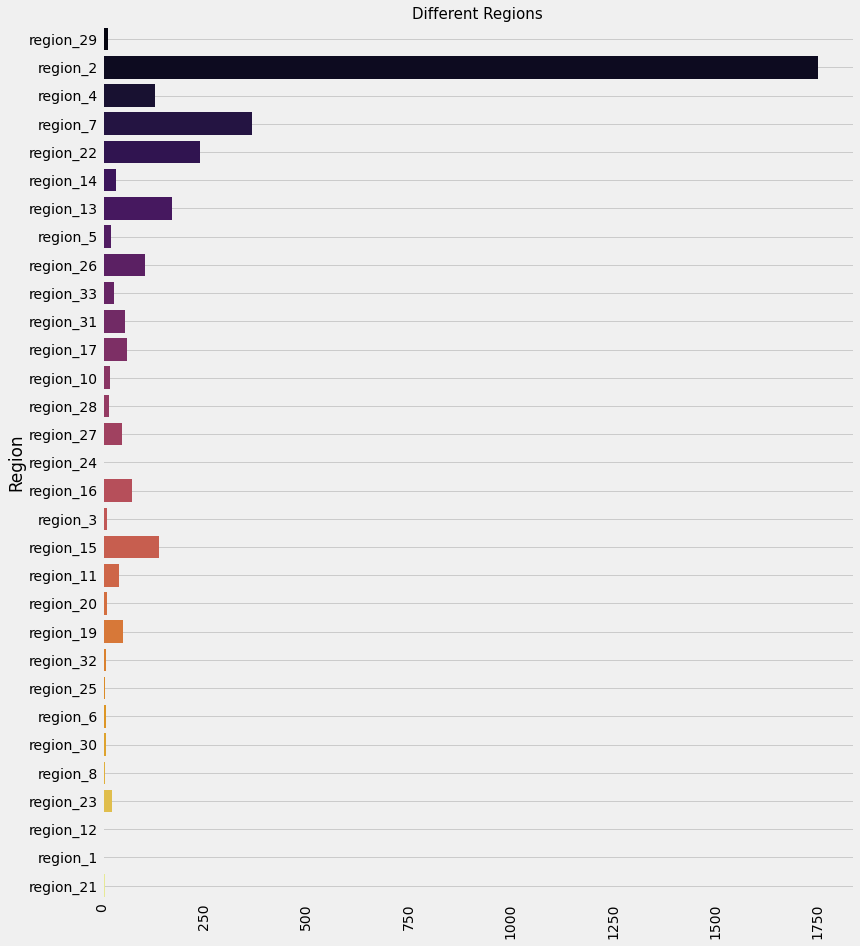

In [128]:
# lets check distribution of different Regions

plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

ValueError: 'explode' must be of length 'x'

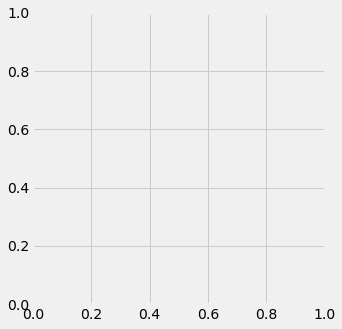

In [129]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

## Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

* Types of Bivariate Analysis
    * Categorical vs Categorical 
    * Categorical vs Numerical
    * Numerical vs Numerical
    
* First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

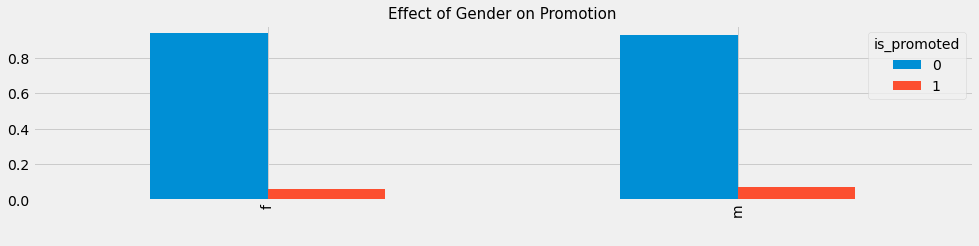

In [135]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

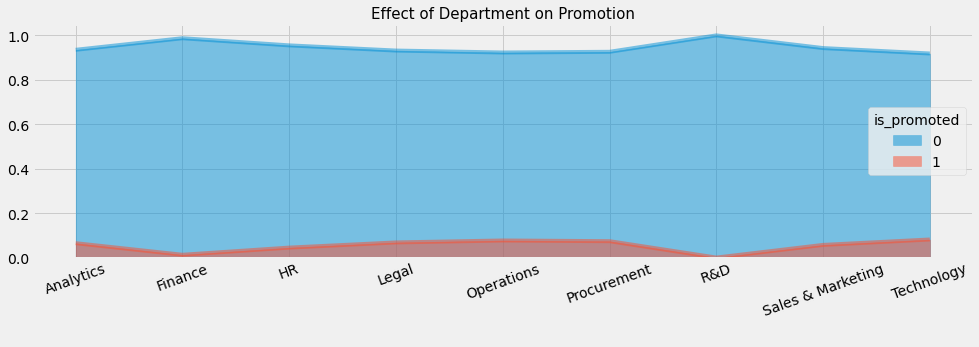

In [140]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

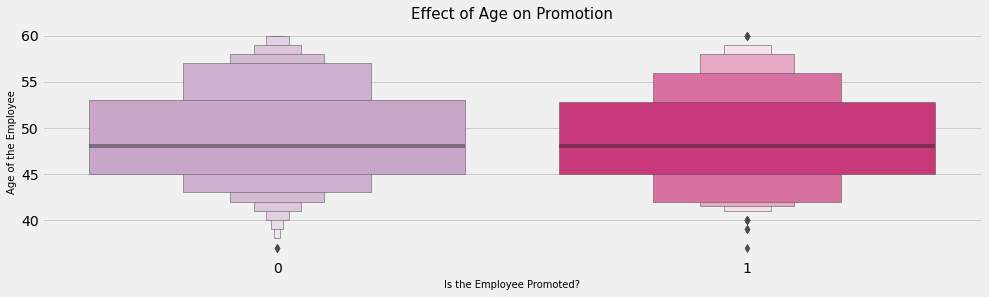

In [141]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

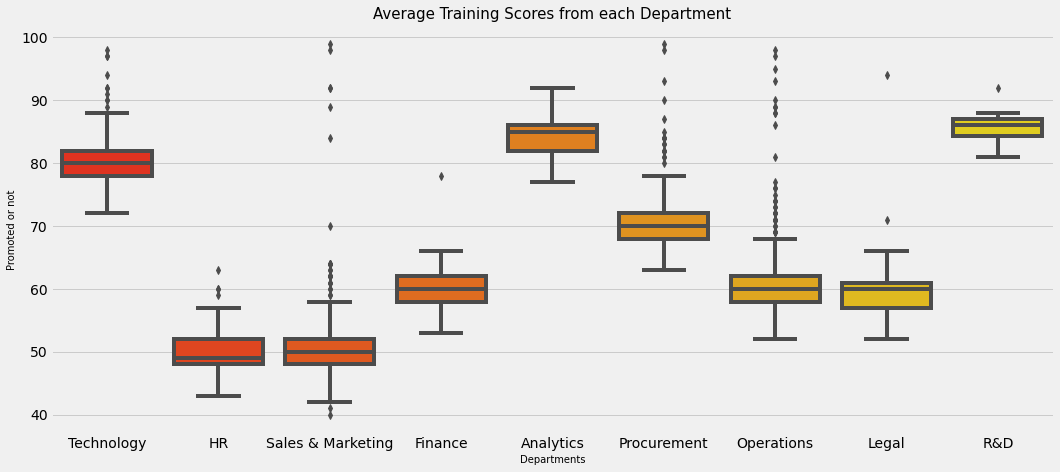

In [142]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Multivariate Analysis

Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
* Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

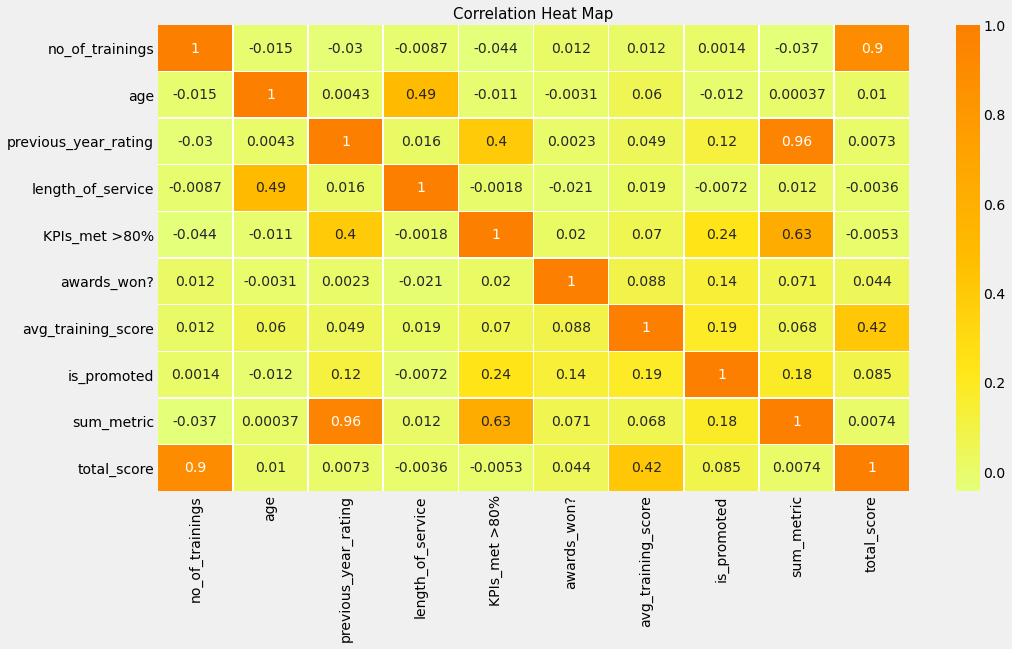

In [151]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

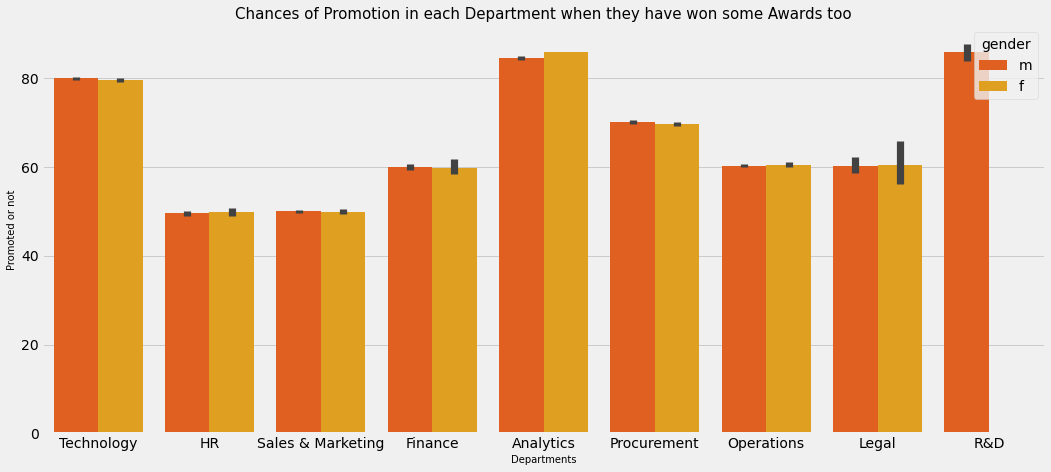

In [152]:
# lets check the relation of Departments and Promotions when they won awards ?

plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

## Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

* There are mutliple ways of performing feature engineering.
* So many people in the Industry consider it the most important step to improve the Model Performance.
* We should always understand the columns well to make some new features using the old existing features.
* Let's discuss the ways how we can perform feature engineering
    * We can perform Feature Engineering by Removing Unnecassary Columns
    * We can do it by Extracting Features from the Date and Time Features.
    * We can do it by Extracting Features from the Categorcial Features.
    * We can do it by Binnning the Numerical and Categorical Features.
    * We can do it by Aggregating Multiple Features together by using simple Arithmetic operations
    
* Here, we are only going to perform Feature Engineering by Aggregating some features together.

In [153]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [154]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

KeyError: "['recruitment_channel' 'region' 'employee_id'] not found in axis"

In [155]:
'''
lets check the no. of employee who did not get an award, did not acheive 80+ KPI, previous_year_rating as 1
and avg_training score is less than 40
but, still got promotion.
''' 

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


In [156]:
# lets remove the above two columns as they have a huge negative effect on our training data

# lets check shape of the train data before deleting two rows
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

# lets check the shape of the train data after deleting the two rows
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3489, 13)
After Deletion of the above two rows : (3489, 13)


## Dealing with Categorical Columns

Categorical variables are known to hide and mask lots of interesting information in a data set. It’s crucial to learn the methods of dealing with such variables. If you won’t, many a times, you’d miss out on finding the most important variables in a model. It has happened with me. Initially, I used to focus more on numerical variables. Hence, never actually got an accurate model. But, later I discovered my flaws and learnt the art of dealing with such variables.

* There are various ways to encode categorical columns into Numerical columns
* This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
* Here, we are going to use Business Logic to encode the education column
* Then we will use the Label Encoder, to Department and Gender Columns

In [157]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [158]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [159]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [160]:
# lets check the data after encoding
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


## Splitting the Data

This is one of the most Important step to perform Machine Learning Prediction on a Dataset,
We have to separate the Target and Independent Columns.
* We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
* Also, we are changing the name of test dataset to x_test for ease of understanding.

In [161]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


## Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

* Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
    
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. These terms are used both in statistical sampling, survey design methodology and in machine learning. Oversampling and undersampling are opposite and roughly equivalent techniques
    
* We are going to use Over Sampling. 
* We will not use Under Sampling to avoid data loss.

In [162]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [163]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
1    3255
0    3255
Name: 0, dtype: int64


In [164]:
# lets create a validation set from the training data so that we can check whether the model that we have created is good enough
# lets import the train_test_split library from sklearn to do that

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step
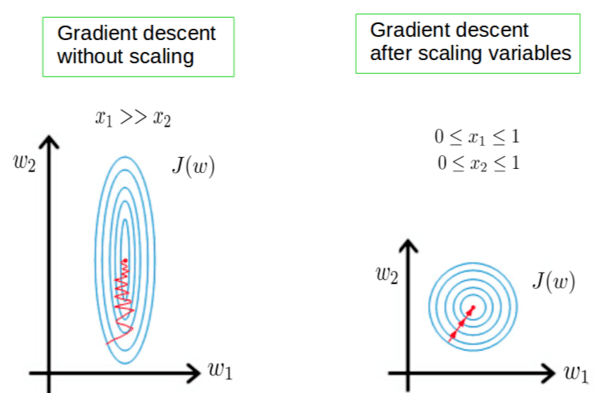

In [165]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


##  Machine Learning Predictive Modelling

Predictive modeling is a process that uses data and statistics to predict outcomes with data models. These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings. Predictive modeling is also often referred to as: Predictive analytics.



### Decision Tree Classifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

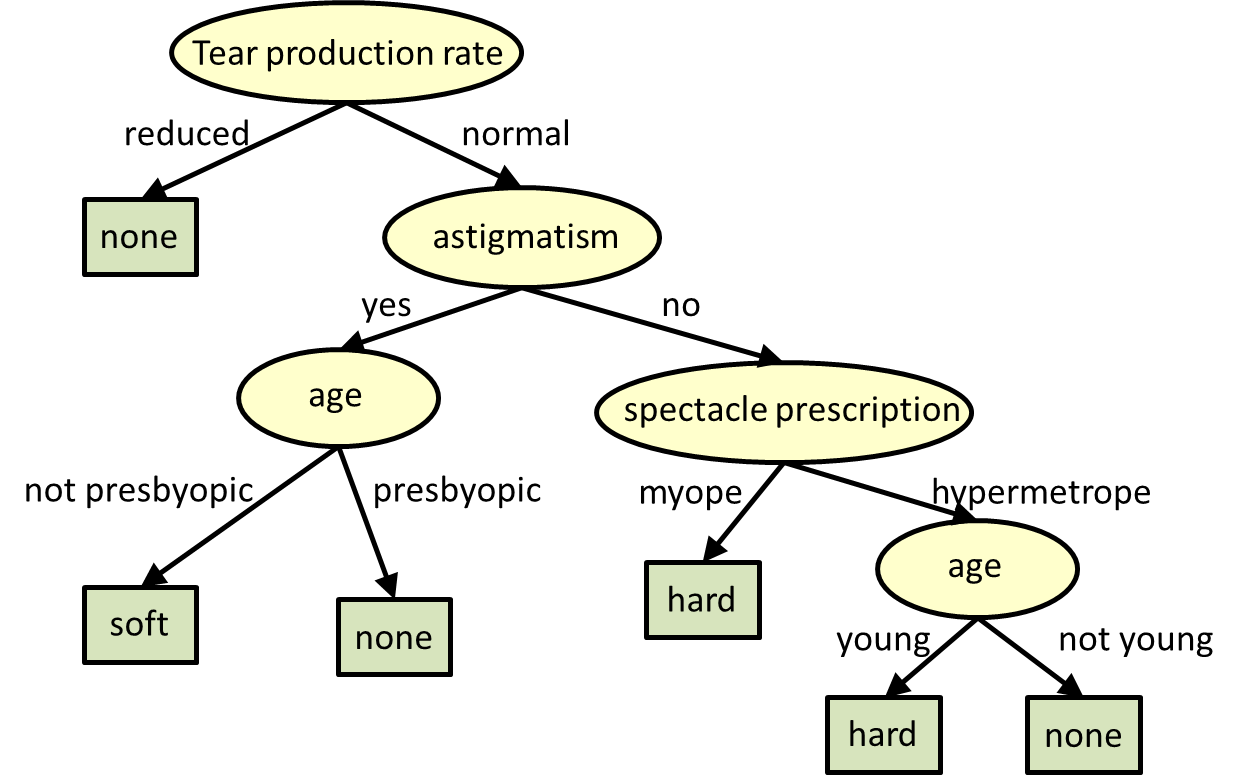

In [172]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9996159754224271
Testing Accuracy : 0.9654377880184332


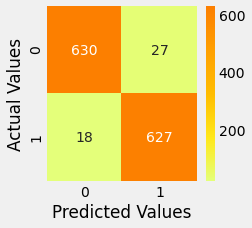

In [173]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [174]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       657
           1       0.96      0.97      0.97       645

    accuracy                           0.97      1302
   macro avg       0.97      0.97      0.97      1302
weighted avg       0.97      0.97      0.97      1302



## Day 5 

In the Started our Data Science Journey on Day 2, Today is the last day of our Data Science Journey. Today we will learn how to perform Real Time Predictions using the Model which we have created yesterday.

So, lets get started, 
* First, we we will check the descriptive summary of the data again, so that we can analyze the columns and values which we can provide to the Model as Input and expect the Model to return Output whether the Employee should get a promotion or not.

* Then we will define the value for which we want the predction, and then finally we will predict the values.

## Real Time Prediction

In [175]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.00000,3489.000000
mean,5.381198,2.504156,0.697334,1.168243,49.145027,3.302379,17.629120,0.241903,0.008598,62.071081,0.067068,3.55288,72.591574
std,2.125439,0.500054,0.459478,0.506902,5.423166,1.230116,3.712584,0.428297,0.092342,12.285130,0.250175,1.45818,35.119410
min,0.000000,2.000000,0.000000,1.000000,37.000000,1.000000,14.000000,0.000000,0.000000,40.000000,0.000000,1.00000,40.000000
25%,4.000000,2.000000,0.000000,1.000000,45.000000,3.000000,15.000000,0.000000,0.000000,51.000000,0.000000,3.00000,52.000000
50%,5.000000,3.000000,1.000000,1.000000,48.000000,3.000000,17.000000,0.000000,0.000000,60.000000,0.000000,3.00000,62.000000
75%,7.000000,3.000000,1.000000,1.000000,53.000000,4.000000,19.000000,0.000000,0.000000,71.000000,0.000000,5.00000,79.000000
max,8.000000,3.000000,1.000000,7.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.00000,469.000000


In [189]:
from sklearn.feature_selection import RFECV
prediction = RFECV(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : RFECV(estimator=array([[  2,   3,   1,   1,  30,   5,  10,   1,   1,  95,   7, 700]]))


**Here comes to an end to this session, where we predicted whether an employee belonging to an organization should get a promotion or not using Logistic Regression and Decision Trees.**

**We also used Feature Selection, and Hyper Parameter Tuning to Improve the Model**.

**This is the end of this Project, Now lets understand how to present this project to a client or Managers using Presentations, Reports, Conclussions, and Visualizations**

